In [5]:
import queues, time
import seaborn as sns
import pandas as pd

In [2]:
def trial(qType, length, repeats):
    # initialising queue
    if qType == "bounded": q = queues.BoundedQueue(length)
    if qType == "circular": q = queues.CircularQueue(length)
    # running trials
    allRepeats = []
    for _ in range(repeats):
        # populating queue
        for i in range(length):
            q.enqueue(i)
        # trial
        start = time.time()
        for _ in range(length):
            q.dequeue()
        end = time.time()

        timeInt = end - start
        allRepeats.append(timeInt)

    average = round((sum(allRepeats)/len(allRepeats)), 3)

    return length, average

In [3]:
cqData = {}
key,val = trial("circular", 1_000, 10)
cqData[key] = val
key,val = trial("circular", 10_000, 10)
cqData[key] = val
key,val = trial("circular", 50_000, 10)
cqData[key] = val
key,val = trial("circular", 100_000, 10)
cqData[key] = val
key,val = trial("circular", 150_000, 10)
cqData[key] = val
key,val = trial("circular", 300_000, 10)
cqData[key] = val


{1000: 0.001,
 10000: 0.005,
 50000: 0.026,
 100000: 0.058,
 150000: 0.08,
 300000: 0.154}

In [4]:
bqData = {}
key,val = trial("bounded", 1_000, 10)
bqData[key] = val
key,val = trial("bounded", 10_000, 10)
bqData[key] = val
key,val = trial("bounded", 50_000, 10)
bqData[key] = val
key,val = trial("bounded", 100_000, 10)
bqData[key] = val
key,val = trial("bounded", 150_000, 10)
bqData[key] = val
key,val = trial("bounded", 300_000, 10)
bqData[key] = val

1000
10000
50000
100000
150000
300000


{1000: 0.0,
 10000: 0.009,
 50000: 0.249,
 100000: 1.043,
 150000: 2.355,
 300000: 9.923}

In [7]:
cqData, bqData

({1000: 0.001,
  10000: 0.005,
  50000: 0.026,
  100000: 0.058,
  150000: 0.08,
  300000: 0.154},
 {1000: 0.0,
  10000: 0.009,
  50000: 0.249,
  100000: 1.043,
  150000: 2.355,
  300000: 9.923})

In [31]:
trials = list(cqData.keys()) + list(bqData.keys())
time = list(cqData.values()) + lipst(bqData.values())
types = ["Circular"]*6 + ["Bounded"]*6

In [47]:
df = pd.DataFrame([trials,time, types]).transpose()
df.columns = ["Trials", "TimeRequired(s)", "QueueType"]
df["TimeRequired(s)"] = pd.to_numeric(df["TimeRequired(s)"])

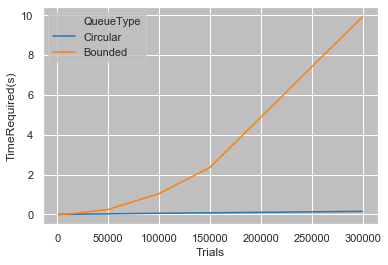

In [66]:
sns.set_style("darkgrid", {"axes.facecolor":"0.75"})
sns.lineplot(data=df, x="Trials", y="TimeRequired(s)", hue="QueueType")